## Implementing agglomerative clustering 

### first let's do our imports and define some helper functions that can calculate euclidean distance to be used as a clustering metric

In [83]:
import numpy as np
from collections import deque
import cv2
import sys
import time as time
import numpy as np
import matplotlib.pyplot as plt

def euclidean_distance(point1, point2):
    """
    Computes euclidean distance of point1 and point2.
    
    point1 and point2 are lists.
    """
    return np.linalg.norm(np.array(point1) - np.array(point2))

def clusters_distance(cluster1, cluster2):
    """
    Computes max distance between two clusters. 
    
    we use single linkage as per: \
    https://medium.com/@codingpilot25/hierarchical-clustering-and-linkage-explained-in-simplest-way-eef1216f30c5
    
    cluster1 and cluster2 are lists of lists of points
    """
    return min([euclidean_distance(point1, point2) for point1 in cluster1 for point2 in cluster2])
  
def clusters_distance_2(cluster1, cluster2):
    """
    Computes distance between two centroids of the two clusters
    
    cluster1 and cluster2 are lists of lists of points
    """
    cluster1_center = np.average(cluster1, axis=0)
    cluster2_center = np.average(cluster2, axis=0)
    return euclidean_distance(cluster1_center, cluster2_center)




### Now we will implement the clustering class 
#### the basic steps are the following:- 
1. get the initial pixels of image
2. consider each point as a cluster itself 
3. group points according to similarity of color 
4. merge groups according to the closest distance untill you reach the desired number of clusters 

#### we start with an initial group of clusters (25 default) instead of each pixel as an individual cluster to reduce computational complexity.









In [84]:
class AgglomerativeClustering:
    
    def __init__(self, n=2, initial_n=25):
        # initialzing no. of initial and final clusters 
        self.n = n
        self.initial_n= initial_n
        
    def initial_clusters(self, points):
        """
        partition pixels into self.initial_k groups based on color similarity
        """
        initialclusters = {}
        d = int(256 / (self.initial_n))
        for i in range(self.initial_n):
            j = i * d
            initialclusters[(j, j, j)] = []
        for i, p in enumerate(points):
            # keep track
            if i%100000 == 0:
                print('processing pixel:', i)
            most_similar = min(initialclusters.keys(), key=lambda c: euclidean_distance(p, c))  
            initialclusters[most_similar].append(p)
        return [g for g in initialclusters.values() if len(g) > 0]
        
    def fit(self, points):

        # initially, assign each set of similar points to a distinct cluster 
        self.clusters_list = self.initial_clusters(points)


        while len(self.clusters_list) > self.n:

            # Find the closest (most similar) pair of clusters
            cluster1, cluster2 = min([(c1, c2) for i, c1 in enumerate(self.clusters_list) for c2 in self.clusters_list[:i]],
                 key=lambda c: clusters_distance_2(c[0], c[1]))

            # Remove the two clusters from the clusters list
            self.clusters_list = [c for c in self.clusters_list if c != cluster1 and c != cluster2]

            # Merge the two clusters
            merged_cluster = cluster1 + cluster2

            # Add the merged cluster to the clusters list
            self.clusters_list.append(merged_cluster)

        
        self.cluster = {}
        for cluster_number, cluster in enumerate(self.clusters_list):
            for point in cluster:
                self.cluster[tuple(point)] = cluster_number
                

        self.centers = {}
        for cluster_number, cluster in enumerate(self.clusters_list):
            self.centers[cluster_number] = np.average(cluster, axis=0)
                    


    def cluster_pred(self, point):
        """
        Find cluster number of point
        """
        # assuming point belongs to clusters that were computed by fit functions
        return self.cluster[tuple(point)]

    def center_pred(self, point):
        """
        Find center of the cluster that point belongs to
        """
        point_cluster_num = self.cluster_pred(point)
        center = self.centers[point_cluster_num]
        return center

### Now we will test the algorithm and define a functions that shows the output image

In [85]:
# test 
image = cv2.imread("seg2.jpg" )
image= image[:,:,::-1] ### convert bgr to rgb to use it with matplotlib
def cluster_and_plot(n_clusters,image):
    pixels = image.reshape((-1,3))
    agglo = AgglomerativeClustering(n=n_clusters, initial_n=25)
    agglo.fit(pixels)
    new_img = [[agglo.center_pred(pixel) for pixel in row] for row in image]
    new_img = np.array(new_img, np.uint8)
    plt.figure(figsize=(15,15))
    plt.subplot(1,2,1)
    plt.imshow(image)
    plt.axis('off')
    plt.title('Original image')
    plt.subplot(1,2,2)
    plt.imshow(new_img)
    plt.axis('off')
    plt.title(f'Segmented image with k={n_clusters}')
    plt.show()

processing pixel: 0


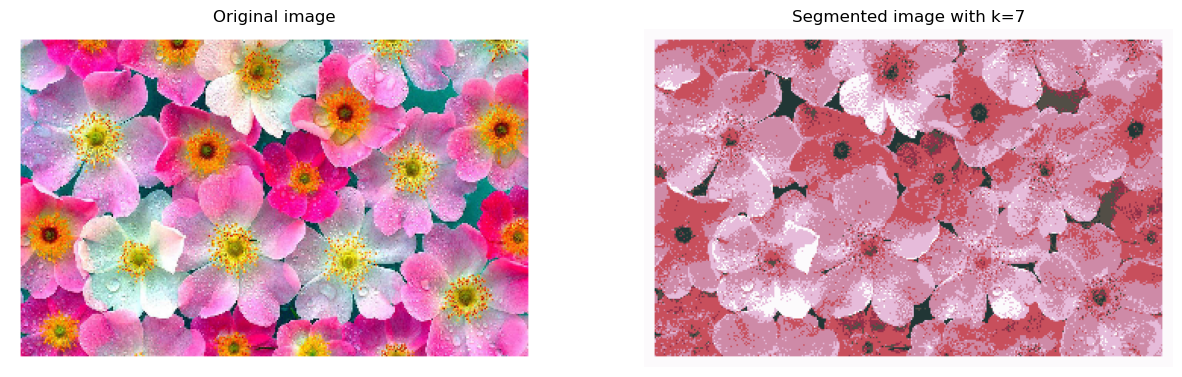

In [86]:
image = cv2.imread("seg4.png" )
image= image[:,:,::-1]
cluster_and_plot(7,image)

processing pixel: 0
processing pixel: 100000


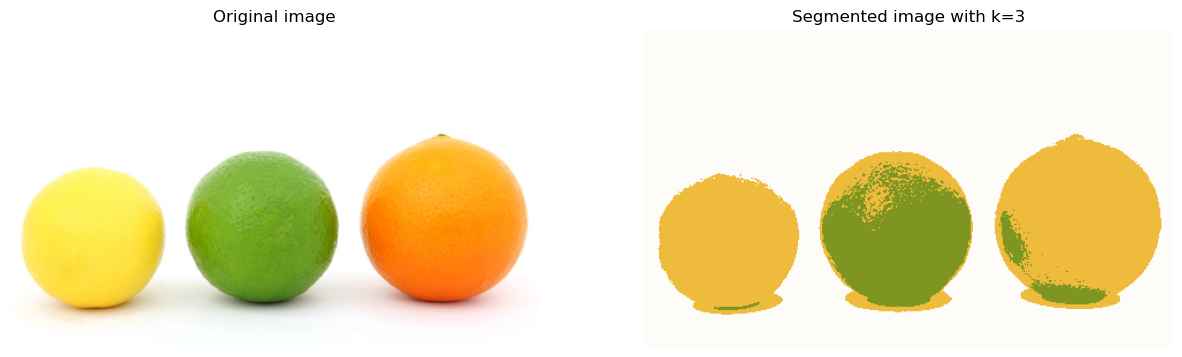

In [88]:
image = cv2.imread("seg2.jpg" )
image= image[:,:,::-1]
cluster_and_plot(3,image)

processing pixel: 0


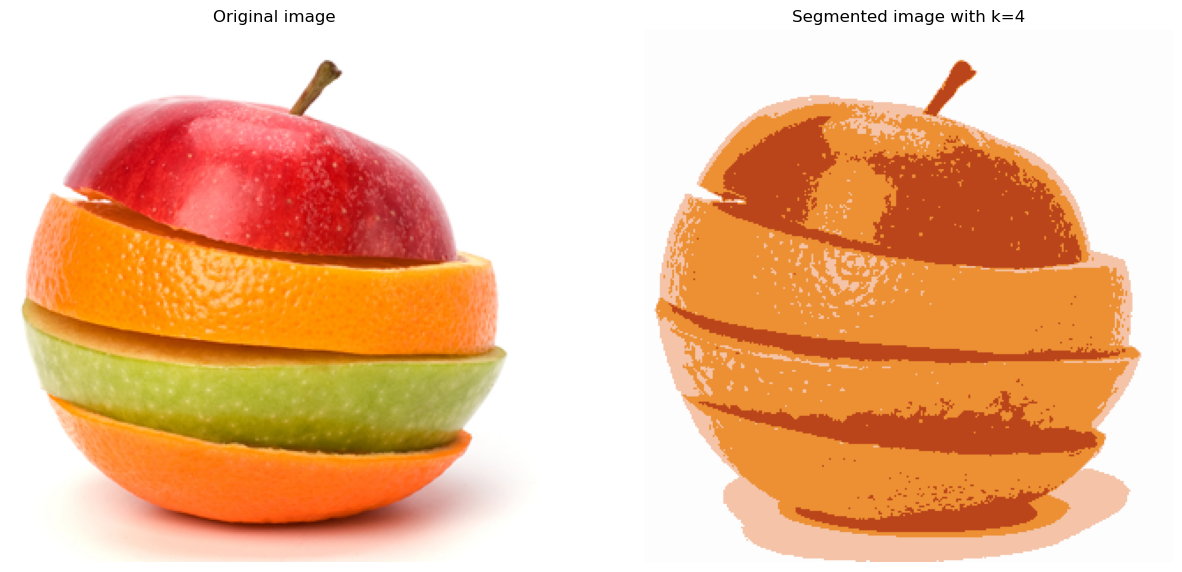

In [89]:
image = cv2.imread("seg3.png" )
image= image[:,:,::-1]
cluster_and_plot(4,image)


processing pixel: 0
processing pixel: 100000


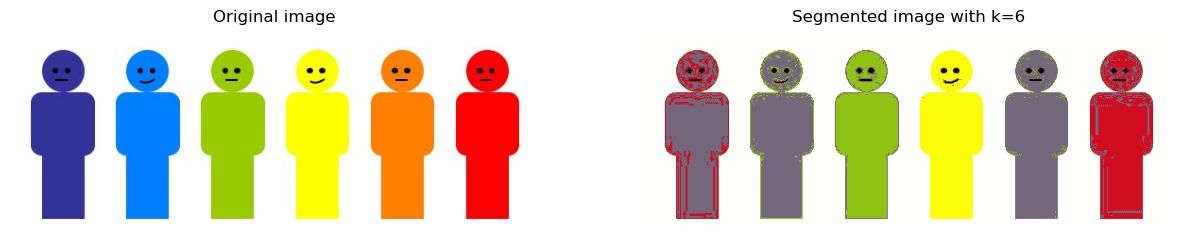

In [90]:
image = cv2.imread("seg1.jpg" )
image= image[:,:,::-1]
cluster_and_plot(6,image)

processing pixel: 0


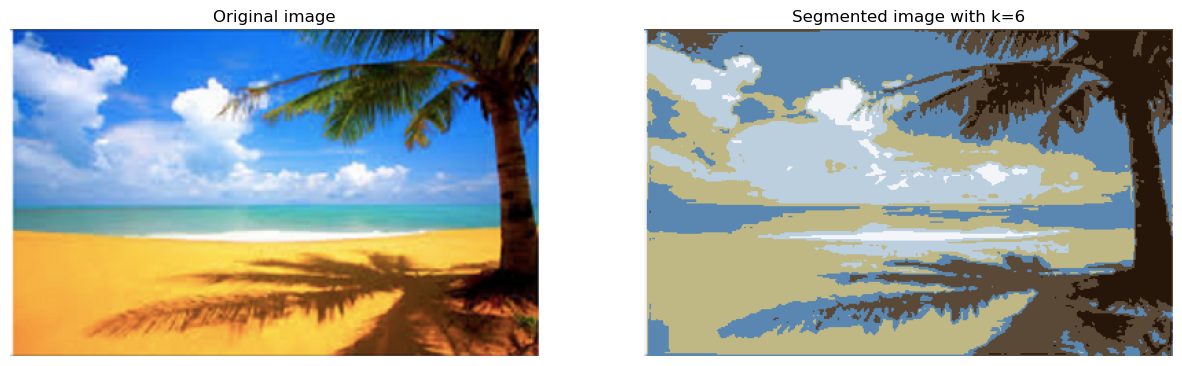

In [91]:
image = cv2.imread("seg6.png" )
image= image[:,:,::-1]
cluster_and_plot(6,image)

processing pixel: 0
processing pixel: 100000


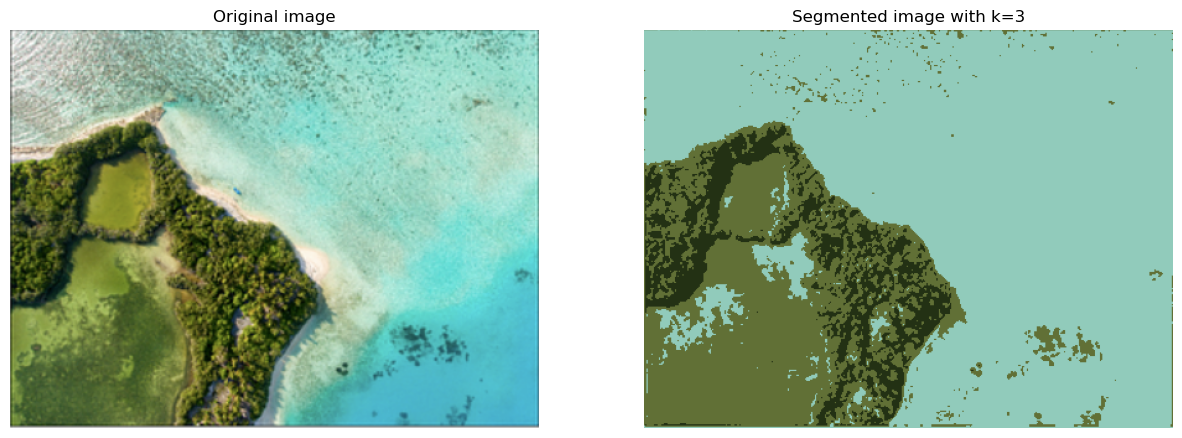

In [92]:
image = cv2.imread("seg5.png" )
image= image[:,:,::-1]
cluster_and_plot(3,image)